In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#imports:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating dataframe:
df = pd.read_csv("loan_data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [3]:
df.shape


(381, 13)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
df.duplicated().sum


<bound method NDFrame._add_numeric_operations.<locals>.sum of 0      False
1      False
2      False
3      False
4      False
       ...  
376    False
377    False
378    False
379    False
380    False
Length: 381, dtype: bool>

In [6]:
df = df.drop(columns=['Loan_ID'],axis=1)


In [7]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
376,Male,Yes,3+,Graduate,No,5703,0.0,128.0,360.0,1.0,Urban,Y
377,Male,Yes,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
378,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
379,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y


In [8]:
# one hot encoding
df_encoded = pd.get_dummies(df[['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area']], drop_first=True).astype(int)
df = pd.concat([df, df_encoded], axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,1,1,0,0,0,0
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1,1,0,1,0,1
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,1,1,1,0,0,1
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,1,0,0,0,0,1
4,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y,1,1,1,0,0,1


In [9]:
df.shape


(381, 18)

In [10]:
# drop the categorical columns after encoding them
df = df.drop(columns=['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'],axis=1)
df.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,N,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,Y,1,1,0,1,0,1
2,0,2583,2358.0,120.0,360.0,1.0,Y,1,1,1,0,0,1
3,0,6000,0.0,141.0,360.0,1.0,Y,1,0,0,0,0,1
4,0,2333,1516.0,95.0,360.0,1.0,Y,1,1,1,0,0,1


In [11]:
df.shape


(381, 13)

In [13]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])
df['Dependents'] = le.fit_transform(df['Dependents'])

In [14]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,0,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,1
3,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,5703,0.0,128.0,360.0,1.0,1,1,1,0,0,0,1
377,0,3232,1950.0,108.0,360.0,1.0,1,1,1,0,0,0,0
378,0,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0
379,3,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,0,0


In [15]:
df['Loan_Status']


0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: int32

In [16]:
print(df.dtypes)


Dependents                   int32
ApplicantIncome              int64
CoapplicantIncome          float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                  int32
Gender_Male                  int32
Married_Yes                  int32
Education_Not Graduate       int32
Self_Employed_Yes            int32
Property_Area_Semiurban      int32
Property_Area_Urban          int32
dtype: object


In [17]:
#check for NAN values:

# Check for NaN values in input data
print(np.isnan(df).any())


Dependents                 False
ApplicantIncome            False
CoapplicantIncome          False
LoanAmount                 False
Loan_Amount_Term            True
Credit_History              True
Loan_Status                False
Gender_Male                False
Married_Yes                False
Education_Not Graduate     False
Self_Employed_Yes          False
Property_Area_Semiurban    False
Property_Area_Urban        False
dtype: bool


In [18]:
# Impute missing values with the mean
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean(), inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mean(), inplace=True)

In [19]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,1,0,1,0,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,1,0,0,1
3,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,5703,0.0,128.0,360.0,1.0,1,1,1,0,0,0,1
377,0,3232,1950.0,108.0,360.0,1.0,1,1,1,0,0,0,0
378,0,2900,0.0,71.0,360.0,1.0,1,0,0,0,0,0,0
379,3,4106,0.0,40.0,180.0,1.0,1,1,1,0,0,0,0


In [20]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [21]:
x

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128.0,360.0,1.0,1,1,0,0,0,0
1,0,3000,0.0,66.0,360.0,1.0,1,1,0,1,0,1
2,0,2583,2358.0,120.0,360.0,1.0,1,1,1,0,0,1
3,0,6000,0.0,141.0,360.0,1.0,1,0,0,0,0,1
4,0,2333,1516.0,95.0,360.0,1.0,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
376,3,5703,0.0,128.0,360.0,1.0,1,1,0,0,0,1
377,0,3232,1950.0,108.0,360.0,1.0,1,1,0,0,0,0
378,0,2900,0.0,71.0,360.0,1.0,0,0,0,0,0,0
379,3,4106,0.0,40.0,180.0,1.0,1,1,0,0,0,0


In [22]:
y

0      0
1      1
2      1
3      1
4      1
      ..
376    1
377    1
378    1
379    1
380    0
Name: Loan_Status, Length: 381, dtype: int32

In [23]:
x_train.shape

(304, 12)

In [24]:
y_train.shape

(304,)

In [25]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [26]:
#imports for building sequential model:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [27]:
# Building layers and model

model = Sequential()

model.add(Dense(15,activation='relu',input_dim=12))
model.add(Dense(7, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [28]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                195       
                                                                 
 dense_1 (Dense)             (None, 7)                 112       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 315 (1.23 KB)
Trainable params: 315 (1.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [29]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [30]:
history=model.fit(x_train_scaled,y_train,epochs=110,validation_split=0.2)


Epoch 1/110


8/8 [==============================] - 1s 37ms/step - loss: 0.6272 - accuracy: 0.6872 - val_loss: 0.6245 - val_accuracy: 0.6557
Epoch 2/110
8/8 [==============================] - 0s 8ms/step - loss: 0.6132 - accuracy: 0.6955 - val_loss: 0.6173 - val_accuracy: 0.6557
Epoch 3/110
8/8 [==============================] - 0s 7ms/step - loss: 0.6011 - accuracy: 0.7119 - val_loss: 0.6113 - val_accuracy: 0.6393
Epoch 4/110
8/8 [==============================] - 0s 7ms/step - loss: 0.5909 - accuracy: 0.7119 - val_loss: 0.6067 - val_accuracy: 0.6393
Epoch 5/110
8/8 [==============================] - 0s 7ms/step - loss: 0.5838 - accuracy: 0.7037 - val_loss: 0.6034 - val_accuracy: 0.6393
Epoch 6/110
8/8 [==============================] - 0s 7ms/step - loss: 0.5770 - accuracy: 0.7037 - val_loss: 0.6010 - val_accuracy: 0.6393
Epoch 7/110
8/8 [==============================] - 0s 7ms/step - loss: 0.5719 - accuracy: 0.7037 - val_loss: 0.5986 - val_accuracy: 0.6393
Epoch 8/110
8/8 [=======

In [31]:
y_log = model.predict(x_test_scaled)


3/3 [==============================] - 0s 5ms/step


In [32]:
y_log

array([[0.85019046],
       [0.8736326 ],
       [0.9748839 ],
       [0.02136959],
       [0.80952007],
       [0.6574627 ],
       [0.9472697 ],
       [0.9476395 ],
       [0.7707111 ],
       [0.09744071],
       [0.8339553 ],
       [0.650526  ],
       [0.81329805],
       [0.07258515],
       [0.7756948 ],
       [0.8481747 ],
       [0.9338141 ],
       [0.97314304],
       [0.8802687 ],
       [0.9450991 ],
       [0.736114  ],
       [0.8162185 ],
       [0.86453235],
       [0.6802059 ],
       [0.89208126],
       [0.96118355],
       [0.8647785 ],
       [0.8686495 ],
       [0.76944476],
       [0.83063227],
       [0.83599275],
       [0.9513135 ],
       [0.9629425 ],
       [0.72676474],
       [0.6107648 ],
       [0.84300864],
       [0.6506397 ],
       [0.9505415 ],
       [0.8578693 ],
       [0.9761907 ],
       [0.52563834],
       [0.8222472 ],
       [0.97310084],
       [0.8503409 ],
       [0.95112014],
       [0.42936504],
       [0.14927933],
       [0.867

In [33]:
y_pred = np.where(y_log>0.62,1,0)


In [34]:
# to check accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)
# accuracy_score(actual data,pr

0.8571428571428571

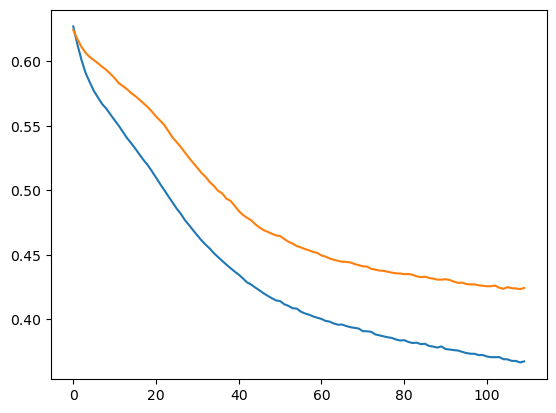

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

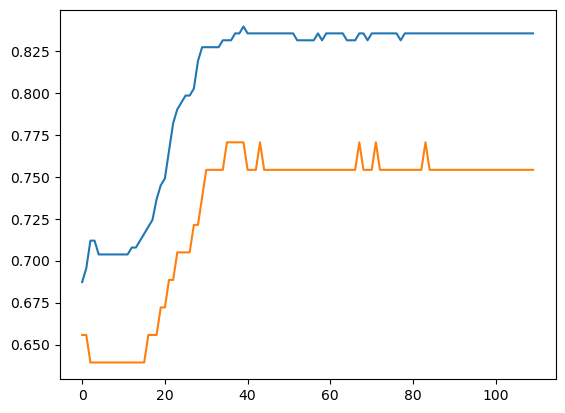

In [36]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [37]:
# Generate predictions on the test set
pred = model.predict(x_test_scaled)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

3/3 [==============================] - 0s 5ms/step - loss: 0.3678 - accuracy: 0.8831
Test Loss: 0.36779868602752686, Test Accuracy: 0.8831169009208679
